## MLP 

We have considered adequated to treat this problem as natural language processing is normally treated. We have sequences of words that behave according to hidden grammar rules that the MLP has to learn in order the predict what word comes next. (Analogous to having a sequence of products that behave according to hidden market rules we need to learn in order to predict what product comes next).

Our training set can be made up of ALL the users, but we will 'hide' the last product they have purchased. That is 

- X_train = Sequence of products all users bought but the last one. 80%
- y_train = target we need to predict, that will be the last product they've purchased. 80%

- X_test = Sequence of all products but the last one 20%
- y_test = Last product this 20% have bought.

**Remarks:**

- We can add these 20% to the X_train (we shall give the sequence of the purchased products but the last two.) and add the 'penultimo' to the y_train.

- We can multiply the training set by transforming the sequence of products 'abcde' to 'ab' 'abc' 'abcd' 'abcde'. (Is it a good idea? It seems ok to me, why ? Test what is better.

- We can add the test.txt to the training set without no problem. (Yes, no?)

- We MUST delete users with only one product, they have no training value. We can use to test but eh. I would just delete them.

- Do some kind of selection of the 'best' users to train the net?

- We are not using the Socio_Demo features, it would be nice to treat them with another approach and then combine the two.




In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot


Using TensorFlow backend.


In [3]:
#Load the data
dftrain = pd.read_csv('train2-2.txt', sep='|')
dftest = pd.read_csv('test2.txt', sep= '|')

In [4]:
dftrain.head(7)

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05
0,A0000001,601,2007-05,5,4,3,1,0
1,A0000001,704,2013-04,5,4,3,1,0
2,A0000001,2501,2006-03,5,4,3,1,0
3,A0000001,2503,2006-03,5,4,3,1,0
4,A0000001,1011,2011-04,5,4,3,1,0
5,A0000002,601,1998-06,5,5,1,1,0
6,A0000002,801,2006-02,5,5,1,1,0


In [353]:
dftrain['Prod_int'] = np.zeros(dftrain.ID_Customer.size, dtype=int)
dftrain.head(6)

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Prod_int
0,A0000001,601,2007-05,5,4,3,1,0,0
1,A0000001,704,2013-04,5,4,3,1,0,0
2,A0000001,2501,2006-03,5,4,3,1,0,0
3,A0000001,2503,2006-03,5,4,3,1,0,0
4,A0000001,1011,2011-04,5,4,3,1,0,0
5,A0000002,601,1998-06,5,5,1,1,0,0


In [256]:
dropusers = dftrain.groupby('ID_Customer')['Cod_Prod'].count()
dropusers[dropusers > 6].head()

ID_Customer
A0000008    13
A0000011     8
A0000023     9
A0000024     9
A0000032     9
Name: Cod_Prod, dtype: int64

In [260]:
Filtereddf[Filtereddf.ID_Customer == 'A0000008']

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Prod_int
28,A0000008,1001,2014-03,3,5,2,1,3,22
29,A0000008,1020,2013-11,3,5,2,1,3,38
30,A0000008,1401,2010-07,3,5,2,1,3,53
31,A0000008,2205,2003-09,3,5,2,1,3,70
32,A0000008,2602,2015-09,3,5,2,1,3,79
33,A0000008,2704,2004-05,3,5,2,1,3,83
34,A0000008,2707,2016-09,3,5,2,1,3,86
35,A0000008,3401,2014-03,3,5,2,1,3,91
36,A0000008,9992,2015-11,3,5,2,1,3,93
37,A0000008,601,2014-03,3,5,2,1,3,11


In [185]:
#Clean the datafram of useless users.
dropusers = dftrain.groupby('ID_Customer')['Cod_Prod'].count()
dropusers = dropusers[dropusers == 1]
users_to_drop= dropusers.index
Filtereddf = dftrain.query('ID_Customer not in @users_to_drop')

In [208]:
#Rellenamos la entrada de Prod_int
for i in range(products.size):
    Filtereddf.loc[Filtereddf['Cod_Prod'] == products[i], 'Prod_int']=i+1

In [209]:
Filtereddf.head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Prod_int
0,A0000001,601,2007-05,5,4,3,1,0,11
1,A0000001,704,2013-04,5,4,3,1,0,14
2,A0000001,2501,2006-03,5,4,3,1,0,75
3,A0000001,2503,2006-03,5,4,3,1,0,77
4,A0000001,1011,2011-04,5,4,3,1,0,31


In [334]:
Filtereddf[Filtereddf.Cod_Prod == 101].head()

,ID_Customer,Cod_Prod,Cod_Fecha,Socio_Demo_01,Socio_Demo_02,Socio_Demo_03,Socio_Demo_04,Socio_Demo_05,Prod_int,for_testing
4399,A0000815,101,2015-05,3,5,5,1,3,1,False
30389,A0004731,101,2013-08,3,5,1,1,1,1,False
50808,A0009160,101,2016-04,5,5,1,1,0,1,False
69852,A0012679,101,2013-04,4,5,1,1,2,1,False
198175,A0039581,101,2015-07,4,5,1,1,3,1,False


In [338]:
Validusers


array(['A0000001', 'A0000002', 'A0000003', ..., 'A0676367', 'A0676369',
       'A0676370'], dtype=object)

In [349]:
#Divide the clients in training not training

Validusers= Filtereddf['ID_Customer'].unique()
users_for_test = np.random.choice(Validusers, size= int(len(Validusers)*0.2), replace= False)
data_test = Filtereddf.query('ID_Customer in @users_for_test')
data_train = Filtereddf.query('ID_Customer not in @users_for_test')
print 'Users for test: ', data_test.shape
print 'Users for train: ', data_train.shape

Users for test:  (655921, 10)
Users for train:  (2621183, 10)


In [350]:
historial_users_train=data_train.groupby(['ID_Customer', 'Prod_int'])['Cod_Fecha'].first()
historial_users_test= data_test.groupby(['ID_Customer', 'Prod_int'])['Cod_Fecha'].first()

In [352]:
historial_users_train.head()

ID_Customer  Prod_int
A0000001     11          2007-05
             14          2013-04
             31          2011-04
             75          2006-03
             77          2006-03
Name: Cod_Fecha, dtype: object

In [218]:
#Sort by fecha and convert indices to a sequences of list

historial_users_train.sort_values(inplace = True)
historial_users_test.sort_values(inplace = True)

In [355]:
X_train = historial_users_train.reset_index().groupby('ID_Customer')['Prod_int'].apply(np.array).values.tolist()
X_test = historial_users_test.reset_index().groupby('ID_Customer')['Prod_int'].apply(np.array).values.tolist()

In [357]:
#Dividimos entre X_train i y_train # SOLO EJECUTAR UNA VEZ BORRA COSAS
#Copy the last product to the target and then delete

X_traindel= np.copy(X_train)
X_testdel = np.copy(X_test)
y_train=np.zeros(len(X_train), dtype=int)
y_test=np.zeros(len(X_test), dtype=int)

i=0
for hist in X_train:
    y_train[i]=hist[-1:]
    X_traindel[i]= np.delete(X_train[i], X_train[i].size-1)
    i=i+1
i=0
for hist in X_test:
    y_test[i]=hist[-1:]
    X_testdel[i]= np.delete(X_test[i], X_test[i].size-1)
    i=i+1

In [358]:
Validusers= Filtereddf.ID_Customer.unique()
for i in np.random.choice(np.arange(len(X_train)), size=3):
    print 'Historial Usuario (en Train): ', i
    print X_train[i]
    print y_train[i]
    print X_traindel[i]
for i in np.random.choice(np.arange(len(X_test)), size=3):
    print 'Historial Usuario (en test): ', i
    print X_train[i]
    print y_train[i]
    print X_traindel[i]

  

Historial Usuario (en Train):  199113
[ 5  6 11]
11
[5 6]
Historial Usuario (en Train):  296388
[ 5  6 11 69 72]
72
[ 5  6 11 69]
Historial Usuario (en Train):  116020
[ 5  6 11 14 16 92 93 94]
94
[ 5  6 11 14 16 92 93]
Historial Usuario (en test):  67755
[ 6 11 73 79 84 92 94]
94
[ 6 11 73 79 84 92]
Historial Usuario (en test):  83623
[ 5  6 11 14]
14
[ 5  6 11]
Historial Usuario (en test):  98532
[ 5  6 11 72 73 75 77]
77
[ 5  6 11 72 73 75]


Parece que todo esta en orden. Hemos creado el set de train i las labels que tiene que dar.

We shall now create the MLP model and fit it.

First we shall explore our training set. 

In [359]:
#Hacemos copia porque habra que jugar un poco
X_train=np.copy(X_traindel)
X_test=np.copy(X_testdel)
print 'Number of product sequences: ', len(X_train)
print 'Number of last objects:', y_train.size

Number of product sequences:  482299
Number of last objects: 482299


Mean lenght:  4.43476764414 Std:  3.0018445685


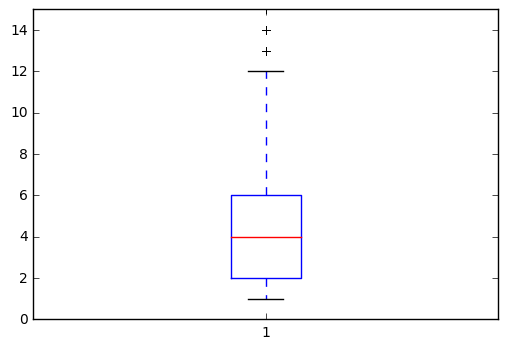

In [360]:
#Sumarize sequence lenght
size= map(len, X_train) #Applies function (len) to the sublists of X
print 'Mean lenght: ', np.mean(size), 'Std: ', np.std(size)
pyplot.boxplot(size)
pyplot.ylim(ymax=15)
pyplot.show()

The mean is 4.43 products with a std of 3 products, the median is 4 products. It is clear that we can get the full purchase historic for most users for sequences with a fixed lenght of 6.

Let's start building our model:

In [361]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
#Fix randome seed
seed=7
np.random.seed(seed)

In [362]:
#Truncate or pad the sequences into maximum fixe lenght of 6
max_products=6
X_train = sequence.pad_sequences(X_train, maxlen=max_products)
X_test = sequence.pad_sequences(X_test, maxlen= max_products)

In [365]:
historial_us

'2013-04'

In [366]:
print X_train.shape
print X_test.shape
print X_train[0]

(482299, 6)
(120574, 6)
[ 0  0 11 14 31 75]


In [380]:
print 'Classes: '
print np.unique(y_test).shape
print np.unique(y_train).shape

Classes: 
(73,)
(80,)


In [385]:
print max_products

6


In [367]:
top_product=np.max(Filtereddf.Prod_int)
print 'Vocabulary Size: ', top_product

Vocabulary Size:  94


In [387]:
#Create the model:
vsdim = 10 #Dimension del espacio N-vectorial
model = Sequential()
model.add(Embedding(94 , vsdim, input_length=max_products))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(100, activation ='relu'))
model.add(Dense(95, activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
embedding_7 (Embedding)          (None, 6, 10)         940         embedding_input_7[0][0]          
____________________________________________________________________________________________________
flatten_7 (Flatten)              (None, 60)            0           embedding_7[0][0]                
____________________________________________________________________________________________________
dense_22 (Dense)                 (None, 200)           12200       flatten_7[0][0]                  
____________________________________________________________________________________________________
dense_23 (Dense)                 (None, 200)           40200       dense_22[0][0]                   
___________________________________________________________________________________________

In [369]:
#Transformamos 
from keras.utils.np_utils import to_categorical

y_cat_train = to_categorical(y_train, nb_classes=None)
y_cat_test = to_categorical(y_test, nb_classes=None)

In [378]:
print

14
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.]


In [384]:
print y_cat_train.shape
print X_train.shape

(482299, 95)
(482299, 6)


In [391]:
#Fit the model

model.fit(X_train, y_cat_train, validation_data=(X_test, y_cat_test), nb_epoch=15, batch_size=128, verbose=1)

scores=model.evaluate(X_test, y_cat_test, verbose=0)

print 'Accuracy: ', (scores[1]*100), '%'

Train on 482299 samples, validate on 120574 samples
Epoch 1/15
482299/482299 [==============================] - 27s - loss: 0.8777 - acc: 0.7485 - val_loss: 0.8826 - val_acc: 0.7481
Epoch 2/15
482299/482299 [==============================] - 26s - loss: 0.8761 - acc: 0.7489 - val_loss: 0.8833 - val_acc: 0.7473
Epoch 3/15
482299/482299 [==============================] - 29s - loss: 0.8745 - acc: 0.7490 - val_loss: 0.8844 - val_acc: 0.7482
Epoch 4/15
482299/482299 [==============================] - 30s - loss: 0.8729 - acc: 0.7494 - val_loss: 0.8855 - val_acc: 0.7482
Epoch 5/15
482299/482299 [==============================] - 27s - loss: 0.8716 - acc: 0.7494 - val_loss: 0.8863 - val_acc: 0.7483
Epoch 6/15
482299/482299 [==============================] - 28s - loss: 0.8699 - acc: 0.7499 - val_loss: 0.8861 - val_acc: 0.7483
Epoch 7/15
482299/482299 [==============================] - 28s - loss: 0.8685 - acc: 0.7500 - val_loss: 0.8875 - val_acc: 0.7479
Epoch 8/15
482299/482299 [============